<a href="https://colab.research.google.com/github/abirhazra/Reinforcement-Learning/blob/main/networkx_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pylab as plt

#Generate random graph

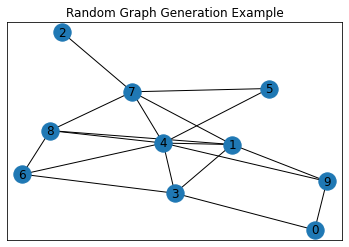

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random


def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g


n = 10
p = 0.4
G = ER(n, p)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Random Graph Generation Example")
plt.show()

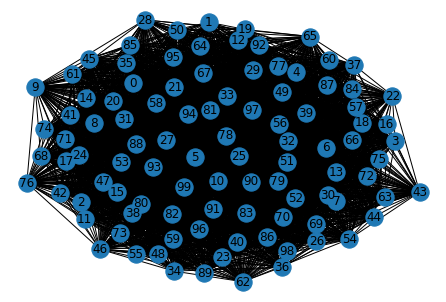

In [4]:
import networkx as nx 
  
#importing the matplotlib library for plotting the graph 
import matplotlib.pyplot as plt 
  
G= nx.erdos_renyi_graph(100,0.7) 
nx.draw(G, with_labels=True) 
plt.show() 

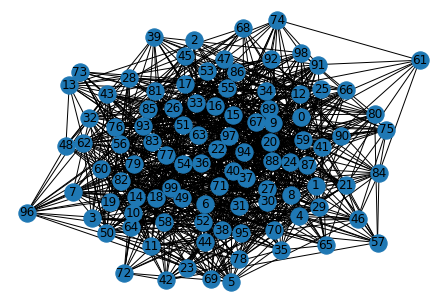

In [5]:
I= nx.erdos_renyi_graph(100,.2) 
nx.draw(I, with_labels=True) 
plt.show() 

In [6]:
points_list = [(0,1),(1,5),(5,6),(5,4),(1,2),(2,3),(2,7),(6,1),(7,1),(7,4)]

{0: Text(-0.7380156864948851, 0.6854870547502734, '0'),
 1: Text(-0.2751312381187334, 0.16756525676198256, '1'),
 2: Text(0.2091071755416303, -0.42225744879581795, '2'),
 3: Text(0.5017509810221088, -1.0, '3'),
 4: Text(0.5865476503635678, 0.4078748005609973, '4'),
 5: Text(-0.011981607249677631, 0.12752800568738354, '5'),
 6: Text(-0.6083041588907308, -0.06676662737227697, '6'),
 7: Text(0.3360268838267201, 0.10056895840745841, '7')}

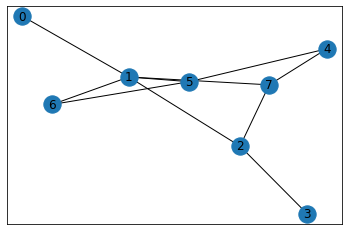

In [7]:
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)

In [8]:
MATRIX_SIZE = 8

In [9]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
R

matrix([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [10]:
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [11]:
goal = 7
for point in points_list:
  print(point)
  if point[1]==goal:
    R[point] = 100
  else:
    R[point] = 0

  if point[0] == goal:
    R[point[::-1]] = 100
  else:
    R[point[::-1]] = 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
(6, 1)
(7, 1)
(7, 4)


In [12]:
R[goal,goal] = 100

In [13]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,   0., 100.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,   0.,  -1.,   0.,  -1.,  -1., 100.]])

In [14]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
gamma = 0.8
initial_state=np.random.randint(0,7)
initial_state

5

In [16]:
def available_actions(state):
  current_state_row=R[state,]
  av_act = np.where(current_state_row>=0)[1]
  return av_act

available_act = available_actions(initial_state)

In [17]:
def sample_next_action(available_act_range):
  next_action = int (np.random.choice(available_act))
  return next_action

action = sample_next_action(available_act)

In [22]:
def update (current_state, action, gamme):
  max_index = np.where(Q[action,]== np.max(Q[action,]))[1]

  if max_index.shape[0]>1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = Q[action,max_index]
  Q[current_state,action] = R[current_state,action] + gamma * max_value
  print('max_value', R[current_state,action]+gamma*max_value)

  if(np.max(Q)>0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return(0)

update(initial_state, action, gamma)



max_value 0.0


0

max_value 319.39062401566184
Score: 1646.141716617289
max_value 399.2382800195773
Score: 1646.141716617289
max_value 499.5124992125295
Score: 1646.3419585633603
max_value 319.39062401566184
Score: 1646.3419585633603
max_value 399.2382800195773
Score: 1646.3419585633603
max_value 319.39062401566184
Score: 1646.3419585633603
max_value 319.39062401566184
Score: 1646.3419585633603
max_value 499.5124992125295
Score: 1646.3419585633603
max_value 399.2382800195773
Score: 1646.3419585633603
max_value 319.39062401566184
Score: 1646.3419585633603
max_value 319.39062401566184
Score: 1646.3419585633603
max_value 399.6099993700236
Score: 1646.3419585633603
max_value 319.2382800195773
Score: 1646.3419585633603
max_value 499.5124992125295
Score: 1646.3419585633603
max_value 399.2382800195773
Score: 1646.3419585633603
max_value 319.39062401566184
Score: 1646.3419585633603
max_value 319.2382800195773
Score: 1646.3419585633603
max_value 499.5124992125295
Score: 1646.3419585633603
max_value 399.238280019

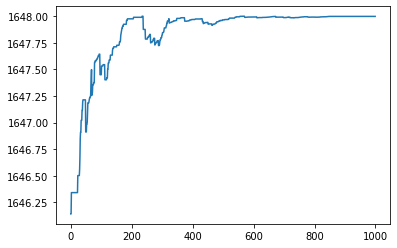

In [26]:
# Training
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()